<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/1_1_Nearest_Neighbor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Nearest neighbor classifier


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/Seeds.csv")
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,groove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Select only the features compactness and area for now

In [ ]:
df = df[["area", "compactness", "wheat_type"]]
df

,area,compactness,wheat_type
0,15.26,0.8710,1
1,14.88,0.8811,1
2,14.29,0.9050,1
3,13.84,0.8955,1
4,16.14,0.9034,1
...,...,...,...
205,12.19,0.8783,3
206,11.23,0.8511,3
207,13.20,0.8883,3
208,11.84,0.8521,3


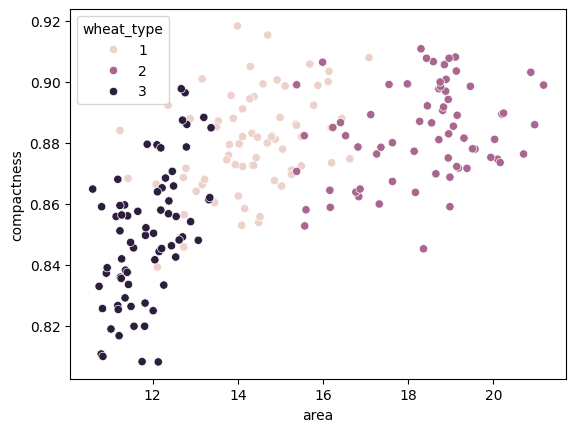

In [ ]:
plt = sns.scatterplot(x = df["area"], y = df["compactness"], hue=df["wheat_type"])

In [ ]:
def distance_sq(p0, p1):
  '''Computes squared Euclidean distance'''
  return np.sum( (p0-p1)**2 )


def nn_classify_sample(training_set, training_labels, new_example):
  dists = np.array([distance_sq(t,new_example) for t in training_set])
  nearest_idx = dists.argmin()
  return training_labels[nearest_idx]

In [ ]:
# split data into training set and labels
seeds_array = df.to_numpy()
training_set = seeds_array[:,:-1]
training_labels = seeds_array[:,-1]

In [ ]:
# classify example 1: Area: 18, Compactness: 0.90
ex1 = np.array([18, 0.9])
pred_type = nn_classify_sample(training_set, training_labels, ex1)
print(f"Predicted type for seed with area 18 and compactness 0.9: {int(pred_type)}")

Predicted type for seed with area 18 and compactness 0.9: 2


In [ ]:
# classify example 2: Area: 13, Compactness: 0.80
ex2 = np.array([13, 0.8])
pred_type2 = nn_classify_sample(training_set, training_labels, ex2)
print(f"Predicted type for seed with area 13 and compactness 0.80: {int(pred_type2)}")

Predicted type for seed with area 13 and compactness 0.80: 1


### Understanding why the second classification turned that way

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

# visualizing distances

# point from which we are finding nearest neighbors
point = np.array([13, 0.8])

# make a grid of the distances in a similar range to the data in question
x = np.linspace(10, 22, 101)
y = np.linspace(0.78, 0.92, 101)
xx, yy = np.meshgrid(x, y)
zz = (xx - point[0])**2 + (yy - point[1])**2

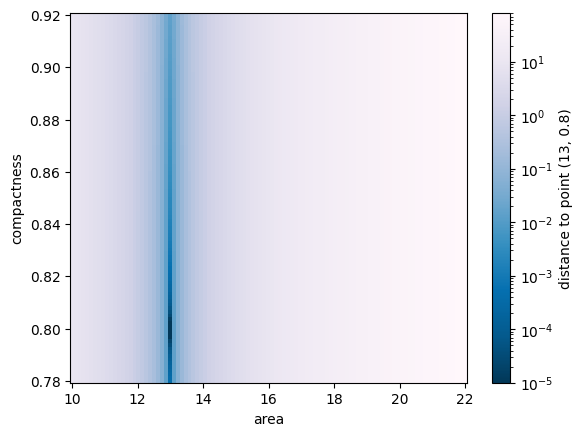

In [ ]:
colormesh = plt.pcolor(x, y, zz, norm=colors.LogNorm(vmin=1e-5, vmax=zz.max()),
                   cmap='PuBu_r', shading='auto')
plt.colorbar(colormesh, label = "distance to point (13, 0.8)")
plt.xlabel("area")
plt.ylabel("compactness")
plt.show()

## Normalizing the data

In [ ]:
mean = training_set.mean(axis = 0)
std = training_set.std(axis = 0)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

# shift by the mean
training_set_normalized = training_set - training_set.mean(axis = 0)
# divide by standard deviation
training_set_normalized /= training_set.std(axis = 0)

Mean: [14.84752381  0.87099857]
Standard deviation: [2.90276331 0.02357309]
(210, 2)
(210, 2)


<Axes: >

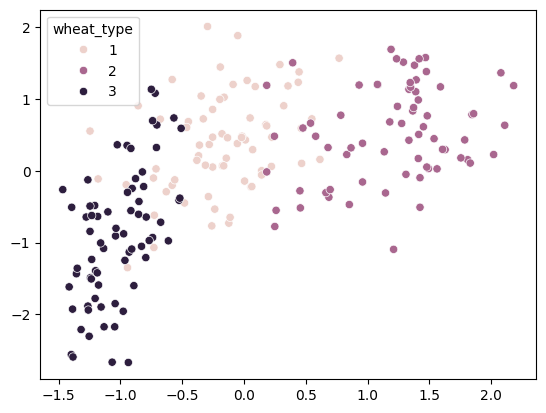

In [ ]:
# visualize the normalized data

sns.scatterplot(x = training_set_normalized[:,0], y = training_set_normalized[:,1], hue=df["wheat_type"])

In [ ]:
# classify example 1: Area: 18, Compactness: 0.90
ex1 = (np.array([18, 0.9]) - mean) / std
print(f"Normalized area and compactness ex1: {ex1}")
pred_type = nn_classify_sample(training_set_normalized, training_labels, ex1)
print(f"Predicted type for seed with area 18 and compactness 0.9: {int(pred_type)}")

Normalized area and compactness ex1: [1.08602592 1.23027698]
Predicted type for seed with area 18 and compactness 0.9: 2


In [ ]:
# classify example 2: Area: 13, Compactness: 0.80
ex2 = (np.array([13, 0.8]) - mean) / std
print(f"Normalized area and compactness ex2: {ex2}")
pred_type2 = nn_classify_sample(training_set_normalized, training_labels, ex2)
print(f"Predicted type for seed with area 13 and compactness 0.80: {int(pred_type2)}")

Normalized area and compactness ex2: [-0.63647071 -3.01184845]
Predicted type for seed with area 13 and compactness 0.80: 3


### Understanding why the second classification turned that way with normalized data

In [ ]:
# visualizing distances

# point from which we are finding nearest neighbors
point = (np.array([13, 0.8]) - mean) / std

print(point)

# make a grid of the distances in a similar range to the data in question
x = np.linspace(-2, 2, 101)
y = np.linspace(-4, 2, 101)
xx, yy = np.meshgrid(x, y)
zz = (xx - point[0])**2 + (yy - point[1])**2

[-0.63647071 -3.01184845]


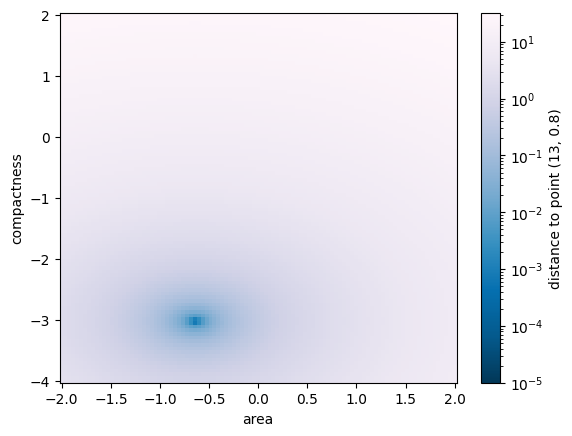

In [ ]:
colormesh = plt.pcolor(x, y, zz, norm=colors.LogNorm(vmin=1e-5, vmax=zz.max()),
                   cmap='PuBu_r', shading='auto')
plt.colorbar(colormesh, label = "distance to point (13, 0.8)")
plt.xlabel("area")
plt.ylabel("compactness")
plt.show()